<a href="https://colab.research.google.com/github/Zero-Asif/Data-Science/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Key Parameters and Model Evaluation Instructions**

## **Task 1: Dataset Preparation**

### **Dataset Creation**

*   We can generate synthetic data or use a real dataset.
*   For simplicity, we generate synthetic data with a linear relationship.



In [32]:
import numpy as np
import pandas as pd

# Generating synthetic data
np.random.seed(42)
X = np.random.rand(30, 1) * 10  # Independent variable
Y = 3.5 * X + np.random.randn(30, 1) * 2  # Dependent variable with noise

# Convert to DataFrame for better readability
data = pd.DataFrame({'X': X.flatten(), 'Y': Y.flatten()})


## **Task 2: Data Visualization**

### **Scatter Plot**

*   Plot the dataset to observe the relationship.




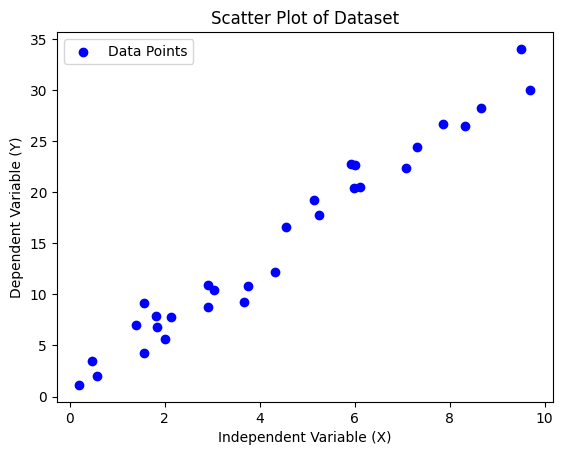

In [33]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(data['X'], data['Y'], color='blue', label='Data Points')
plt.title('Scatter Plot of Dataset')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.legend()
plt.show()


## **Task 3: Linear Regression Implementation**

### **Model Training**

*   Using `scikit-learn` to fit a linear regression model or implement it manually.


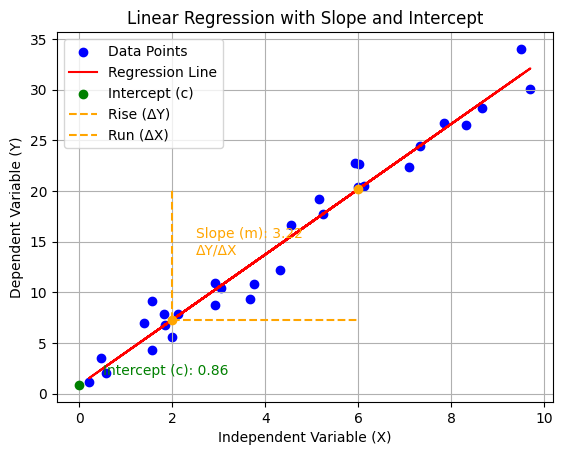

In [34]:
from sklearn.linear_model import LinearRegression

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Extract slope and intercept
slope = model.coef_[0][0]  # Slope (m)
intercept = model.intercept_[0]  # Intercept (c)

# Generate predictions
predictions = model.predict(X)

# Plot data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot regression line
plt.plot(X, predictions, color='red', label='Regression Line')

# Annotate intercept (c)
plt.scatter(0, intercept, color='green', label='Intercept (c)', zorder=5)
plt.text(0.5, intercept + 1, f"Intercept (c): {intercept:.2f}", color='green')

# Improved Slope (m) visualization
x1 = 2  # Arbitrary starting X value
x2 = 6  # Arbitrary ending X value
y1 = slope * x1 + intercept
y2 = slope * x2 + intercept

# Draw rise and run
plt.plot([x1, x1], [y1, y2], color='orange', linestyle='--', label='Rise (ΔY)')
plt.plot([x1, x2], [y1, y1], color='orange', linestyle='--', label='Run (ΔX)')
plt.scatter([x1, x2], [y1, y2], color='orange', zorder=5)  # Mark key points

# Annotate slope calculation
plt.text(x1 + 0.5, y1 + (y2 - y1) / 2, f"Slope (m): {slope:.2f}\nΔY/ΔX", color='orange')

# Add labels, title, and legend
plt.title('Linear Regression with Slope and Intercept')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.legend()
plt.grid()
plt.show()


## **Task 4: Coefficient of Determination (R²)**

### **Calculation R²**

*   R² indicates the proportion of variance in the dependent variable explained by the independent variable.




In [35]:
# R-squared calculation
r_squared = model.score(X, Y)
print(f"Coefficient of Determination (R²): {r_squared}")


Coefficient of Determination (R²): 0.9675097523135491


### **Significance of R²**

1.   **Proportion of Variance Explained:**

*  ***R²*** represents the proportion of the variance in ***Y*** that is explained by the independent variable ***X***.
*  For example, an ***R²=0.85*** means that 85% of the variability in ***Y*** is explained by ***X***, while the remaining 15% is due to other factors or noise.


2.   **Model Fit:**

*   A higher ***R²*** value (closer to 1) indicates a better fit of the model, meaning the regression line closely matches the data points.
*   A lower ***R²*** value (closer to 0) suggests the model poorly explains the data and might not be suitable.


3.   **Prediction Accuracy:**

*   A good ***R²*** indicates that the model can make reliable predictions because it captures most of the relationship between ***X*** and ***Y***.


4.   **Comparison Across Models:**

*   ***R²*** allows comparison of different regression models. A model with a higher ***R²*** is generally considered better at explaining the variation in ***Y***.









## **Task 5: Predictions and Visualization**

###   1.   Predict ***Y*** values for the given X values.


In [36]:
from sklearn.linear_model import LinearRegression

# Use the regression model to predict Y values for the given X values
predicted_Y = model.predict(X)

# Display the predicted Y values
print("Predicted Y values for the given X values:")
print(predicted_Y)


Predicted Y values for the given X values:
[[12.92331879]
 [31.48410306]
 [24.43827978]
 [20.14303241]
 [ 5.8839024 ]
 [ 5.8831254 ]
 [ 2.72903886]
 [28.76080411]
 [20.2221666 ]
 [23.66768074]
 [ 1.5210482 ]
 [32.10246534]
 [27.67411831]
 [ 7.69820113]
 [ 6.71522333]
 [ 6.76610647]
 [10.65875412]
 [17.76236336]
 [14.77255116]
 [10.23955208]
 [20.56807507]
 [ 5.35157575]
 [10.26904412]
 [12.65986511]
 [15.54970899]
 [26.15147696]
 [ 7.29020224]
 [17.42340953]
 [19.94189191]
 [ 2.35428881]]


### 2. Overlay the regression line on the scatter plot of the original data.



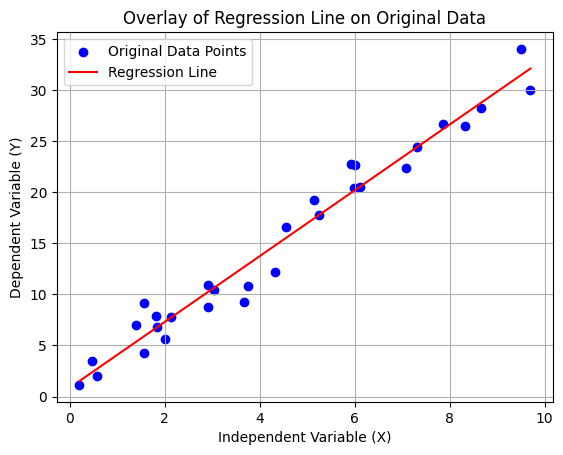

In [37]:
from sklearn.linear_model import LinearRegression

# Create a scatter plot of the original data
plt.scatter(X, Y, color='blue', label='Original Data Points')

# Overlay the regression line on the original data
sorted_indices = np.argsort(X.flatten())  # Sort X for a smooth line
plt.plot(X[sorted_indices], predicted_Y[sorted_indices], color='red', label='Regression Line')

# Add labels, title, and legend
plt.title('Overlay of Regression Line on Original Data')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.legend()
plt.grid()
plt.show()


## **Task 6: Residual Analysis**

### **1. Residual Plot**

*   Residuals are differences between actual and predicted values. Plot them to check patterns.

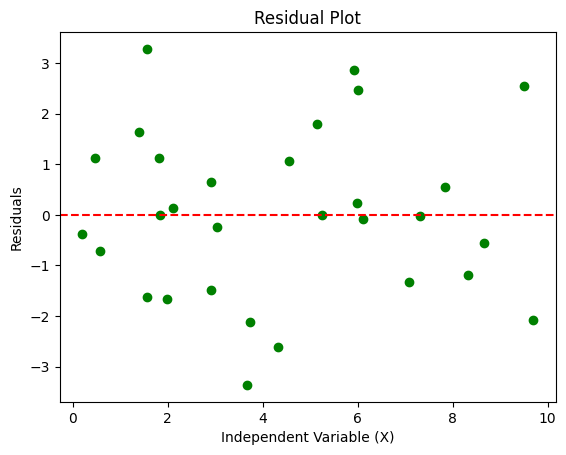

In [38]:
# Residuals
residuals = Y - predictions

# Residual plot
plt.scatter(data['X'], residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.show()


### **2. Residual Plot Reveals**

   1.  **Random Scatter Around Zero:**

       *   This indicates that the model's assumptions of linearity and homoscedasticity are valid.

   2.  **Curved Pattern:**

       *   Indicates the relationship between ***X*** and ***Y*** may not be linear, and a transformation or non-linear model might be better.

   3.  **Funnel Shape (Increasing/Decreasing Spread):**

       *   Suggests heteroscedasticity, meaning the variability of residuals changes with 𝑋.

   4.  **Clusters or Trends:**

       *   Suggests violations of independence, meaning residuals are correlated.


## **Task 7: Model Evaluation**

### **Additional Metrics:**

*   Compute MAE, MSE, and RMSE to evaluate the model.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluation metrics
mae = mean_absolute_error(Y, predictions)
mse = mean_squared_error(Y, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.297494840149146
Mean Squared Error (MSE): 2.6866553447483033
Root Mean Squared Error (RMSE): 1.6391019933940363


# **Gradient Descent**

## **Step 1: Dataset Preparation**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(30) * 10  # Random dataset of 30 points
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(30)
Y = true_slope * X + true_intercept + noise  # Adding some noise
print("Y (Actual Values):", Y)


Y (Actual Values): [13.21250939 29.14355568 22.69920986 19.67476836  8.2987594  10.75214119
  6.43859308 25.59669272 20.85042021 21.48097079  5.72347595 27.28807618
 24.48287997 10.505339   10.28409076  9.75648103 12.49040779 17.8178071
 14.32010348 11.5608843  19.8356836   9.54446874 12.6472345  12.39600593
 16.72583357 24.24431675  9.31492255 18.46753725 20.84136374  7.09254044]


## **Step 2: Data Visualization**

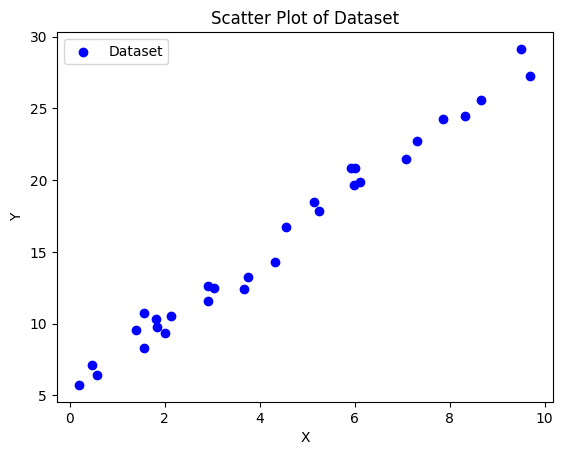

In [25]:
plt.scatter(X, Y, color='blue', label='Dataset')
plt.title("Scatter Plot of Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## **Step 3: Cost Function (Mean Squared Error)**

In [26]:
def compute_cost(X, Y, theta0, theta1):
    m = len(Y)
    predictions = theta0 + theta1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

## **Step 4: Gradient Descent**

In [27]:
def gradient_descent(X, Y, theta0, theta1, alpha, iterations):
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        predictions = theta0 + theta1 * X

        # Derivatives as per the formula
        d_theta0 = (1 / m) * np.sum(predictions - Y)
        d_theta1 = (1 / m) * np.sum((predictions - Y) * X)

        # Update rules
        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1

        # Calculate and store the cost
        cost = compute_cost(X, Y, theta0, theta1)
        cost_history.append(cost)

    return theta0, theta1, cost_history

# Initialize parameters and hyperparameters
theta0 = 0  # Initial intercept
theta1 = 0  # Initial slope
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Perform Gradient Descent
theta0, theta1, cost_history = gradient_descent(X, Y, theta0, theta1, alpha, iterations)

# Final parameters
print(f"Optimized Theta0 (Intercept): {theta0}")
print(f"Optimized Theta1 (Slope): {theta1}")

Optimized Theta0 (Intercept): 5.127631733584621
Optimized Theta1 (Slope): 2.4102527665797293


### **Experiment with different learning rates (𝛼)**

Learning Rate: 0.001
  Final Cost: 2.3098656039832868
  Optimized Theta0: 1.7147466507915257, Theta1: 2.9715626019153203
Learning Rate: 0.01
  Final Cost: 0.34882554771795754
  Optimized Theta0: 5.127631733584621, Theta1: 2.4102527665797293
Learning Rate: 0.1
  Final Cost: inf
  Optimized Theta0: -7.86918161028637e+246, Theta1: -4.784632450877631e+247
Learning Rate: 0.5
  Final Cost: nan
  Optimized Theta0: nan, Theta1: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-26-08d3341df50d>:4: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
<ipython-input-27-1523692b40ac>:10: RuntimeWarning: overflow encountered in multiply
  d_theta1 = (1 / m) * np.sum((predictions - Y) * X)
<ipython-input-27-1523692b40ac>:13: RuntimeWarning: invalid value encountered in scalar subtract
  theta0 = theta0 - alpha * d_theta0
<ipython-input-27-1523692b40ac>:14: RuntimeWarning: invalid value encountered in scalar subtract
  theta1 = theta1 - alpha * d_theta1


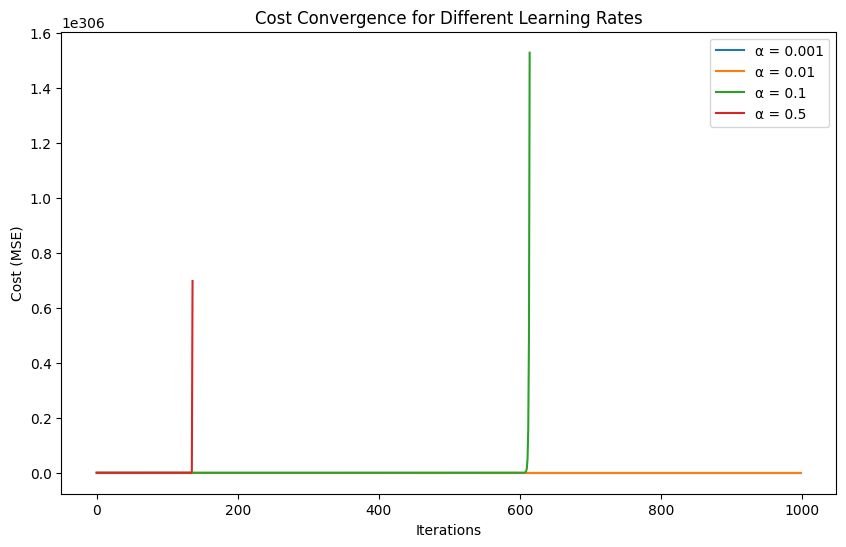

In [28]:
# Experiment: Test Different Learning Rates (α)
learning_rates = [0.001, 0.01, 0.1, 0.5]  # Different values of alpha
iterations = 1000  # Fixed number of iterations

# Store cost histories for visualization
cost_histories = {}
optimized_parameters = {}

for alpha in learning_rates:
    # Reinitialize parameters for each learning rate
    theta0, theta1 = 0, 0
    theta0, theta1, cost_history = gradient_descent(X, Y, theta0, theta1, alpha, iterations)
    cost_histories[alpha] = cost_history
    optimized_parameters[alpha] = (theta0, theta1)
    print(f"Learning Rate: {alpha}")
    print(f"  Final Cost: {cost_history[-1]}")
    print(f"  Optimized Theta0: {theta0}, Theta1: {theta1}")

# Visualization of Cost vs. Iterations for Different Learning Rates
plt.figure(figsize=(10, 6))
for alpha, cost_history in cost_histories.items():
    plt.plot(range(iterations), cost_history, label=f"α = {alpha}")
plt.title("Cost Convergence for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.show()


## **Step 5: Model Prediction and Visualization**

### **1.   Using the optimized parameters to predict YYY**


In [29]:
# Use the optimized parameters to predict YYY
def predict(X, theta0, theta1):
    return theta0 + theta1 * X

# Use the final optimized parameters (from a suitable learning rate, e.g., α = 0.01)
optimized_alpha = 0.01  # Choose the learning rate that worked best
theta0, theta1 = optimized_parameters[optimized_alpha]

# Predict YYY using the optimized parameters
YYY = predict(X, theta0, theta1)
print(f"Predicted YYY values:{YYY}")

Predicted YYY values:[14.15499531 28.04224961 22.77053597 19.55681441  8.88807533  8.88749398
  6.5275936  26.00466625 19.61602293 22.19397063  5.62377008 28.50491078
 25.19160351 10.24554102  9.51007304  9.54814401 12.46063881 17.77558814
 15.5385985  12.14699014 19.87483306  8.48978637 12.16905621 13.9578782
 16.12007115 24.05235707  9.94027459 17.52198151 19.40632027  6.24720409]


### **2.   Plotting the regression line over the scatter plot of the dataset**





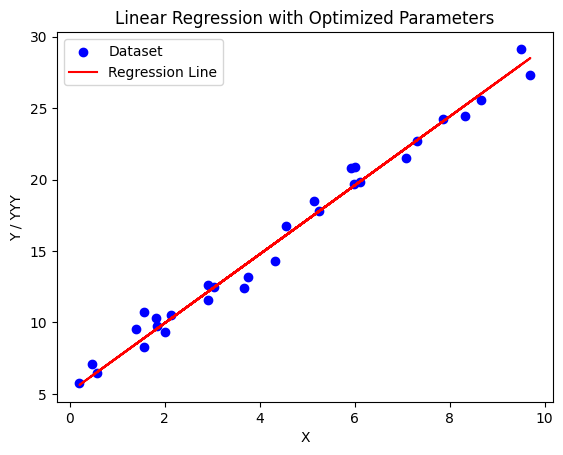

In [30]:
# Plot the regression line over the scatter plot of the dataset
plt.scatter(X, Y, color='blue', label='Dataset')  # Original dataset
plt.plot(X, YYY, color='red', label='Regression Line')  # Regression line
plt.title("Linear Regression with Optimized Parameters")
plt.xlabel("X")
plt.ylabel("Y / YYY")
plt.legend()
plt.show()


## **Step 6: Model Evaluation**

### **Computing metrics:**

In [31]:
def compute_metrics(Y, Y_pred):
    MAE = np.mean(np.abs(Y - Y_pred))
    MSE = np.mean((Y - Y_pred) ** 2)
    RMSE = np.sqrt(MSE)
    denom = np.sum((Y - np.mean(Y)) ** 2)
    #R2 = 1 - (np.sum((Y - Y_pred) ** 2) / np.sum((Y - np.mean(Y)) ** 2))
    R2 = 1 - (np.sum((Y - Y_pred) ** 2) / denom if denom != 0 else 0)
    return MAE, MSE, RMSE, R2

MAE, MSE, RMSE, R2 = compute_metrics(Y, YYY)
print(f"Mean Absolute Error (MAE): {MAE:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"R-Squared (R²): {R2:.4f}")

Mean Absolute Error (MAE): 0.6686
Mean Squared Error (MSE): 0.6977
Root Mean Squared Error (RMSE): 0.8353
R-Squared (R²): 0.9840


### **Interpretations**

In [21]:
print("\nInterpretation of Metrics:")
print(f"1. MAE ({MAE:.4f}): On average, the predictions differ from the actual values by approximately {MAE:.2f}.")
print(f"2. MSE ({MSE:.4f}): The average squared difference between predicted and actual values, used to penalize larger errors more heavily.")
print(f"3. RMSE ({RMSE:.4f}): The square root of MSE, indicating that the model's predictions deviate from the actual values by approximately {RMSE:.2f} on average.")
print(f"4. R² ({R2:.4f}): This indicates that {R2 * 100:.2f}% of the variance in the dependent variable (Y) is explained by the independent variable (X) using the model.")



Interpretation of Metrics:
1. MAE (nan): On average, the predictions differ from the actual values by approximately nan.
2. MSE (nan): The average squared difference between predicted and actual values, used to penalize larger errors more heavily.
3. RMSE (nan): The square root of MSE, indicating that the model's predictions deviate from the actual values by approximately nan on average.
4. R² (nan): This indicates that nan% of the variance in the dependent variable (Y) is explained by the independent variable (X) using the model.
